<a href="https://colab.research.google.com/github/SallyPeter/gomycodeDSbootcamp/blob/main/Projects/Video_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import metrics
import matplotlib.pyplot as plt


In [5]:
pd.set_option("display.max_columns", None) #This allows pandas to display all available columns in a dataframe.
pd.set_option("display.max_rows", 50) #This allows pandas to display all available rows in a dataframe.

In [6]:
data = pd.read_csv('video_games_sales.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(16719, 16)

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16717,11562,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16719,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16450.0,NaN,NaN,NaN,2006.487356,5.878995,1980.0,2003.0,2007.0,2010.0,2020.0
Genre,16717,12,Action,3370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16665,581,Electronic Arts,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16719.0,NaN,NaN,NaN,0.26333,0.813514,0.0,0.0,0.08,0.24,41.36
EU_Sales,16719.0,NaN,NaN,NaN,0.145025,0.503283,0.0,0.0,0.02,0.11,28.96
JP_Sales,16719.0,NaN,NaN,NaN,0.077602,0.308818,0.0,0.0,0.0,0.04,10.22
Other_Sales,16719.0,NaN,NaN,NaN,0.047332,0.18671,0.0,0.0,0.01,0.03,10.57
Global_Sales,16719.0,NaN,NaN,NaN,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Handling Datatype inconsistency

In [10]:
# creating cat and num cols

num_cols = data.select_dtypes('number')
cat_cols = data.select_dtypes('object')
print(num_cols.columns)
print(cat_cols.columns)

Index(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'],
      dtype='object')
Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')


In [11]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**User Score is not expected to be a categorical variable.**  Hence we check to see why this is the case.

In [12]:
data.User_Score.dtypes

dtype('O')

In [13]:
data.User_Score.sample(10)

,User_Score
4993,5.4
10451,5.9
15596,8.4
2930,7.6
2365,NaN
11202,NaN
8700,7.3
10390,NaN
12504,7.9
16666,NaN


### The value "tbd" is a reason why the User_Score is seen as Object instead of numeric.
There could be other possible string values that may influence this as well. So we would not want to change each one after the other. Hence we force convert the column to numeric which would convert all string values to null values. Thereby changing the entire column to a numeric column.

In [14]:
data.User_Score = pd.to_numeric(data.User_Score, errors='coerce')

data.User_Score.dtype

dtype('float64')

In [15]:
# data.User_Score.iloc[7461]
data.User_Score.iloc[13168]

nan

In [16]:
data.User_Score.sample(10)

,User_Score
12773,NaN
15484,NaN
672,8.5
4563,NaN
16316,NaN
10028,6.2
3077,NaN
5253,NaN
12270,6.0
10362,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


This dataset has about 16,500 rows and 16 columsn of which 10 are of datatype float and the rest are objects

## Handling Missing Values

In [18]:
# Number of missing values in each columns
data.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [19]:
# Effect of removing all na -- not a good approach

ndata = data.copy()

ndata.dropna(axis = 0, inplace=True)

ndata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [20]:
s = data.loc[data.Name.isnull()]
s

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for each in s.index:
  print(each)

659
14246


In [22]:
data = data.drop(index=s.index)

data.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,269
Genre,0
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [23]:
num_cols = data.select_dtypes('number')
cat_cols = data.select_dtypes('object')


for each in data.columns:
  if each in cat_cols:
    data[each] = data[each].fillna(data[each].mode()[0])
  else:
    data[each] = data[each].fillna(data[each].mean())



In [24]:
data.isnull().sum()

,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


## Checking for duplicates

In [25]:
data.duplicated().sum()

0

## Handle data issues to ensure data cleanliness.

### Types of statistical analysis
- Descriptive
- Diagnostics
- Prescriptive
- Predictive
- Exploratory

### Things to consider when cleaning a dataset:

**1. Data Integrity:** Answers questions on the data source, authenticity and any other related compliance issues surrounding the data use.

**2. Data Inconsistency:** Same values represented in different ways. Correct data types must be assigned to the columns

**3. Data Inaccuracy:** Does this data give an accurate representation of the real world?

**4. Data Incompleteness:** Check to ensure no missing values

**5. Data Validity and Relevance**


*In plain text, we want our data to have 0 missing values, 0 duplicates, uniform formats and relevant*

*Remember Outliers and handle them*




# Exploratory Data Analysis

In [26]:
data.Name.value_counts().head(20)

,count
Name,
Need for Speed: Most Wanted,12
FIFA 14,9
Ratatouille,9
LEGO Marvel Super Heroes,9
Madden NFL 07,9
FIFA 15,8
LEGO Harry Potter: Years 5-7,8
Lego Batman 3: Beyond Gotham,8
LEGO Star Wars II: The Original Trilogy,8


In [27]:
data.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [28]:
data.Platform.value_counts()

,count
Platform,
PS2,2161
DS,2152
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


Text(0.5, 1.0, 'Count of Games per Platform')

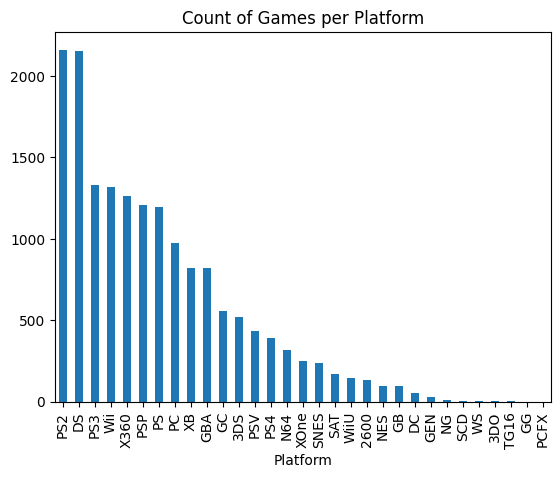

In [29]:
data.Platform.value_counts().plot(kind='bar')
plt.title('Count of Games per Platform')

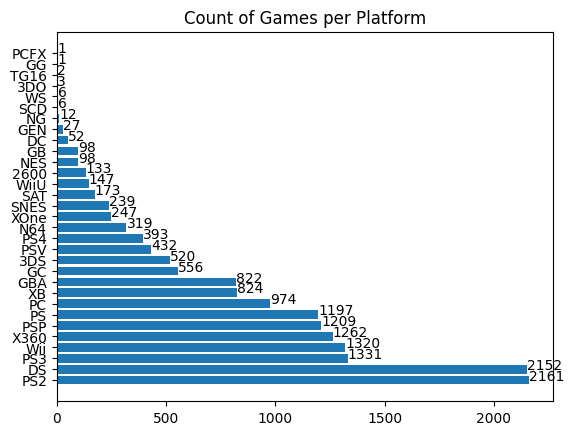

In [30]:
p_count = data.Platform.value_counts().reset_index()

plt.barh(p_count.Platform, p_count['count'])
for index, value in enumerate(p_count['count']):
    plt.text(value, index, str(value))

plt.title('Count of Games per Platform')
plt.show()


In [31]:
data.Genre.value_counts()

,count
Genre,
Action,3370
Sports,2348
Misc,1750
Role-Playing,1500
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,874


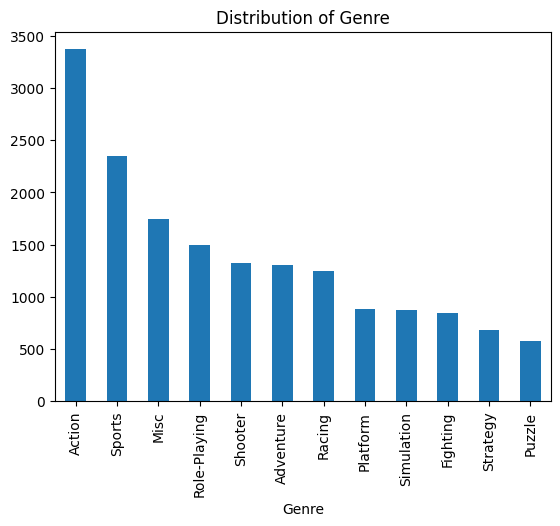

In [32]:
data.Genre.value_counts().plot(kind = 'bar')
plt.title('Distribution of Genre');

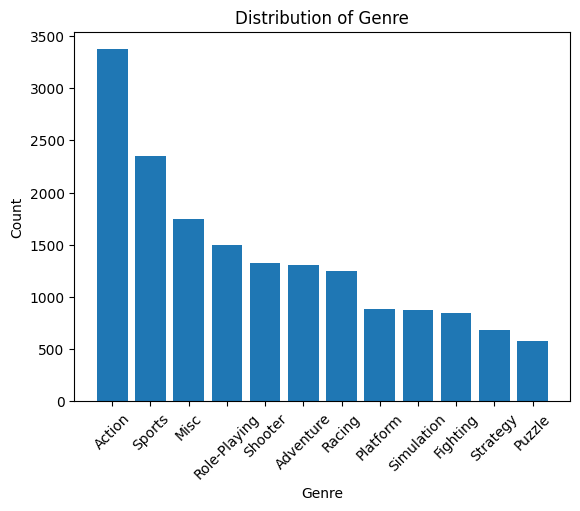

In [33]:
gen = data.Genre.value_counts().reset_index()

plt.bar(gen.Genre, gen['count'])
plt.xticks(rotation=45);
plt.title('Distribution of Genre');
plt.xlabel('Genre');
plt.ylabel('Count');

In [34]:
data.Rating.value_counts()

,count
Rating,
E,10758
T,2961
M,1563
E10+,1420
EC,8
K-A,3
RP,3
AO,1


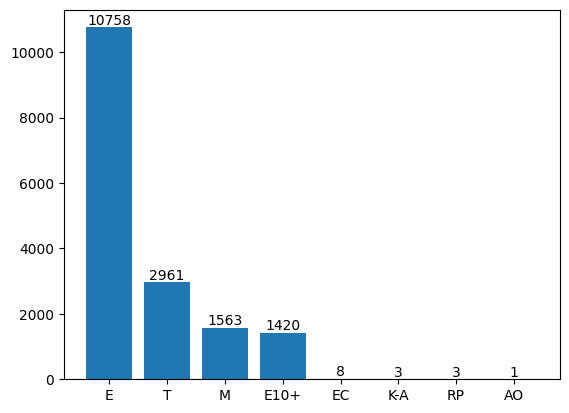

In [35]:
# data.Rating.value_counts().plot(kind = 'barh')
# plt.title('Distribution of Rating');

rat_count = data.Rating.value_counts().reset_index()


plt.bar(rat_count.Rating, rat_count['count'])

for index, value in enumerate(data.Rating.value_counts().reset_index()['count']):
  plt.text( index, value, str(value), ha='center', va='bottom')

In [36]:
def plot_(x, y):
  plt.figure(figsize=(8,8))
  plt.bar(x, y)

  for index, value in enumerate(y):
    plt.text( index, value, str(value), ha='center', va='bottom', size='x-small')

  plt.xticks(rotation=90)
  plt.show()

Top Performers:

In [37]:
#Which games have the highest global sales?

ggs = data.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(20)

ggs.head()

,Name,Global_Sales
0,Wii Sports,82.53
1,Grand Theft Auto V,56.57
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.52


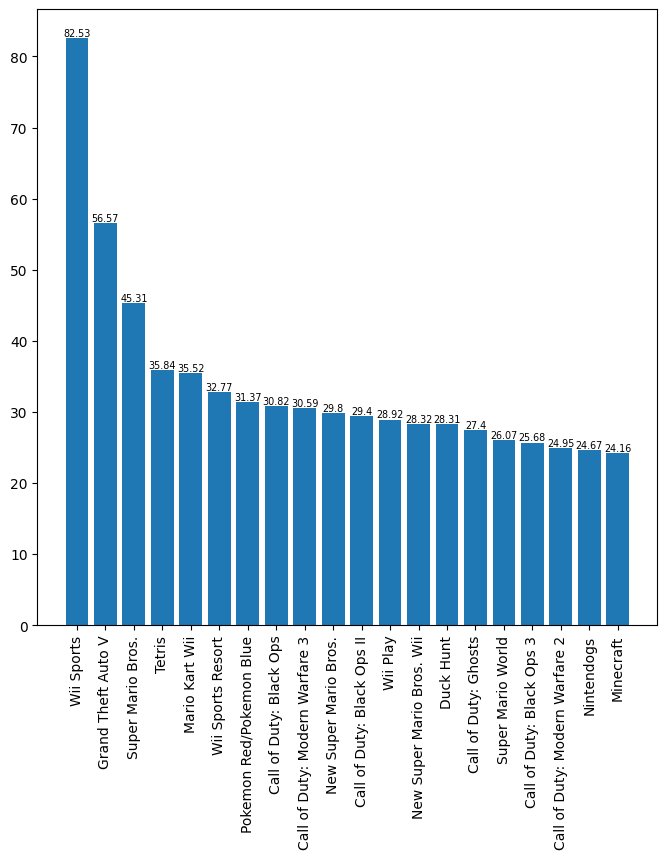

In [38]:
plot_(ggs.Name, ggs.Global_Sales)

In [39]:
# What are the top-selling games in each region (NA, EU, JP, Other)?

region_sales = data.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

NA_top_games = region_sales.sort_values(by='NA_Sales', ascending=False).reset_index(drop=True)[:20]
EU_top_games = region_sales.sort_values(by='EU_Sales', ascending=False).reset_index(drop=True)[:20]
JP_top_games = region_sales.sort_values(by='JP_Sales', ascending=False).reset_index(drop=True)[:20]
Other_top_games = region_sales.sort_values(by='Other_Sales', ascending=False).reset_index(drop=True)[:20]


In [40]:
NA_top_games.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,41.36,28.96,3.77,8.45
1,Super Mario Bros.,32.48,4.88,6.96,0.99
2,Duck Hunt,26.93,0.63,0.28,0.47
3,Tetris,26.17,2.95,6.03,0.69
4,Grand Theft Auto V,23.84,23.42,1.42,7.90


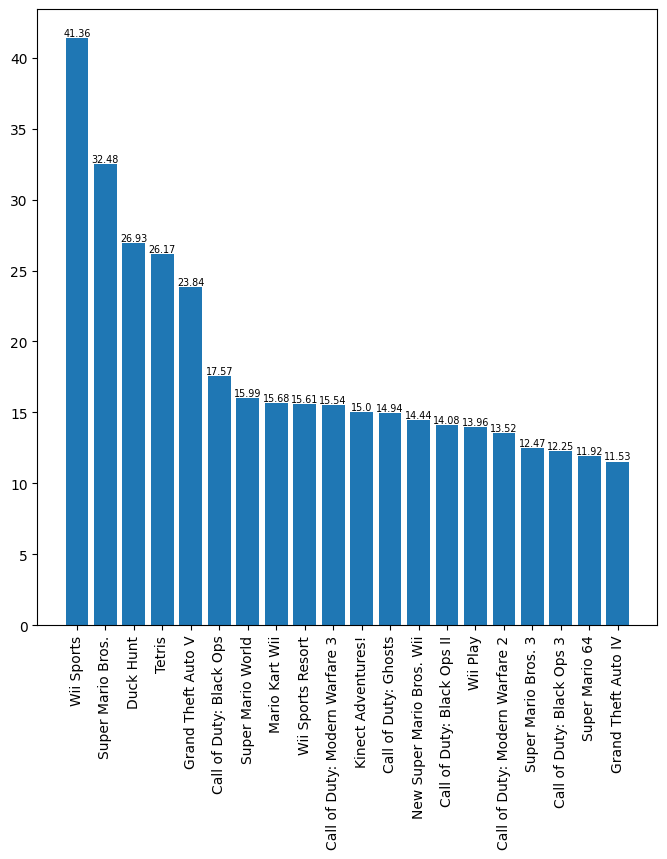

In [41]:
plot_(NA_top_games.Name, round(NA_top_games.NA_Sales, 2))

In [42]:
EU_top_games.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii Sports,41.36,28.96,3.77,8.45
1,Grand Theft Auto V,23.84,23.42,1.42,7.90
2,Mario Kart Wii,15.68,12.76,3.79,3.29
3,FIFA 15,3.09,12.02,0.14,2.12
4,Call of Duty: Modern Warfare 3,15.54,11.15,0.62,3.29


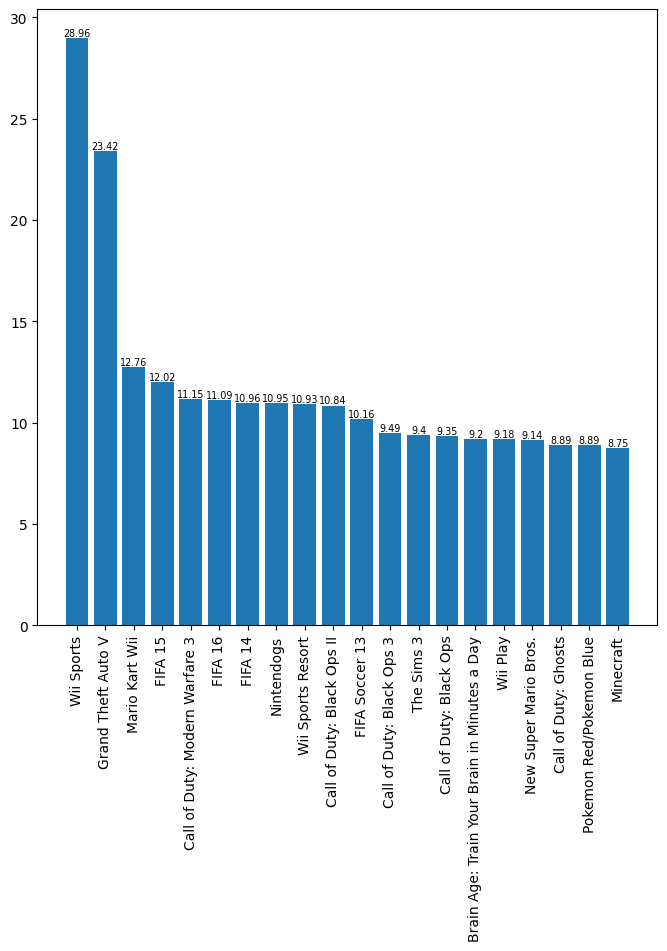

In [43]:
plot_(EU_top_games.Name, round(EU_top_games.EU_Sales, 2))

In [44]:
JP_top_games.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
1,Pokemon Gold/Pokemon Silver,9.00,6.18,7.20,0.71
2,Super Mario Bros.,32.48,4.88,6.96,0.99
3,New Super Mario Bros.,11.28,9.14,6.50,2.88
4,Pokemon Diamond/Pokemon Pearl,6.38,4.46,6.04,1.36


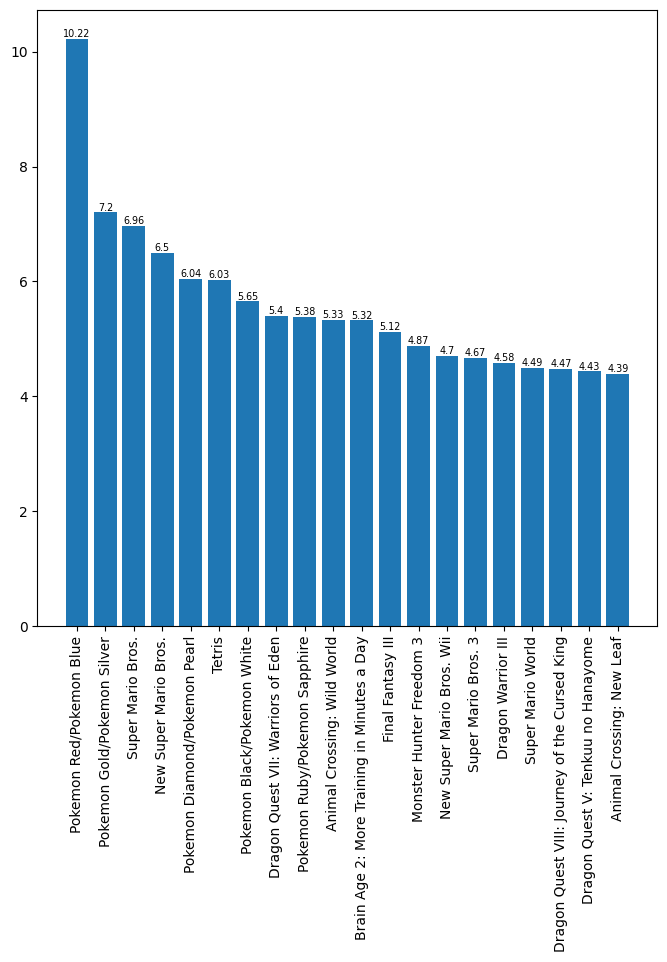

In [45]:
plot_(JP_top_games.Name, round(JP_top_games.JP_Sales, 2))

In [46]:
Other_top_games.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Grand Theft Auto: San Andreas,10.77,1.96,0.41,10.71
1,Wii Sports,41.36,28.96,3.77,8.45
2,Grand Theft Auto V,23.84,23.42,1.42,7.90
3,Gran Turismo 4,3.01,0.01,1.10,7.53
4,Call of Duty: Black Ops II,14.08,10.84,0.72,3.76


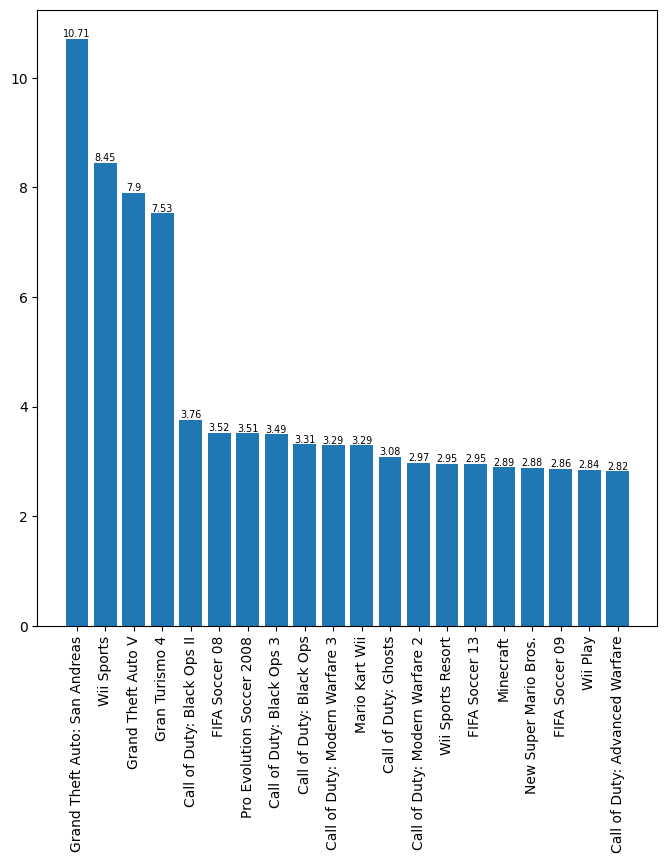

In [47]:
plot_(Other_top_games.Name, round(Other_top_games.Other_Sales, 2))

## 2. Sales by Platform:

In [48]:
# - Which platforms generate the most sales globally and in each region?

pgs = data.groupby("Platform")['Global_Sales'].sum().sort_values(ascending=False).head(20).reset_index()
pgs.head()

,Platform,Global_Sales
0,PS2,1255.64
1,X360,971.63
2,PS3,939.43
3,Wii,908.13
4,DS,807.10


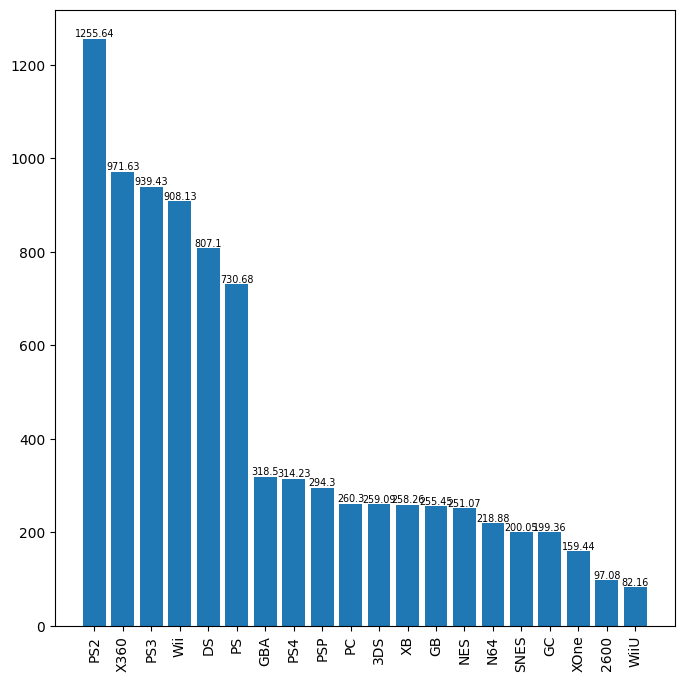

In [49]:
plot_(pgs.Platform, round(pgs.Global_Sales, 2))

In [50]:
platform_region_sales = data.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

NA_top_platforms = platform_region_sales.sort_values(by='NA_Sales', ascending=False).reset_index(drop=True)[:20]
EU_top_platforms = platform_region_sales.sort_values(by='EU_Sales', ascending=False).reset_index(drop=True)[:20]
JP_top_platforms = platform_region_sales.sort_values(by='JP_Sales', ascending=False).reset_index(drop=True)[:20]
Other_top_platforms = platform_region_sales.sort_values(by='Other_Sales', ascending=False).reset_index(drop=True)[:20]

In [51]:
NA_top_platforms.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,X360,602.47,270.76,12.43,85.76
1,PS2,583.84,339.29,139.20,193.44
2,Wii,496.90,262.21,69.33,79.07
3,PS3,393.49,330.29,80.19,135.68
4,DS,382.67,188.89,175.57,59.28


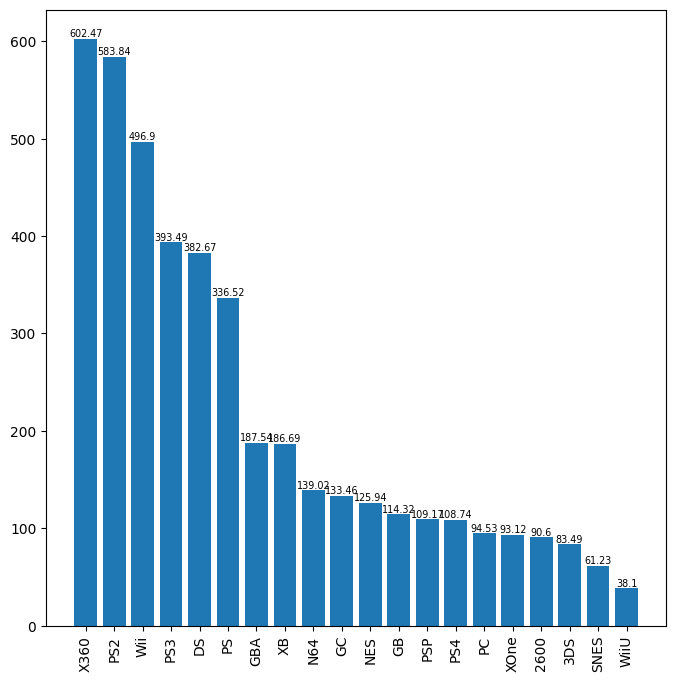

In [52]:
plot_(NA_top_platforms.Platform, round(NA_top_platforms.NA_Sales, 2))

In [53]:
EU_top_platforms.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,PS2,583.84,339.29,139.20,193.44
1,PS3,393.49,330.29,80.19,135.68
2,X360,602.47,270.76,12.43,85.76
3,Wii,496.90,262.21,69.33,79.07
4,PS,336.52,213.61,139.82,40.91


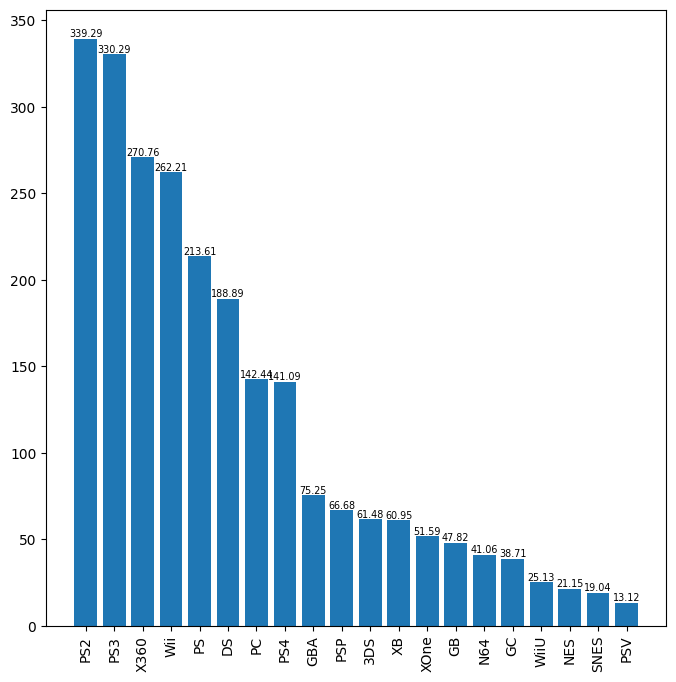

In [54]:
plot_(EU_top_platforms.Platform, round(EU_top_platforms.EU_Sales, 2))

In [55]:
JP_top_platforms.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,DS,382.67,188.89,175.57,59.28
1,PS,336.52,213.61,139.82,40.91
2,PS2,583.84,339.29,139.20,193.44
3,SNES,61.23,19.04,116.55,3.22
4,3DS,83.49,61.48,100.67,13.36


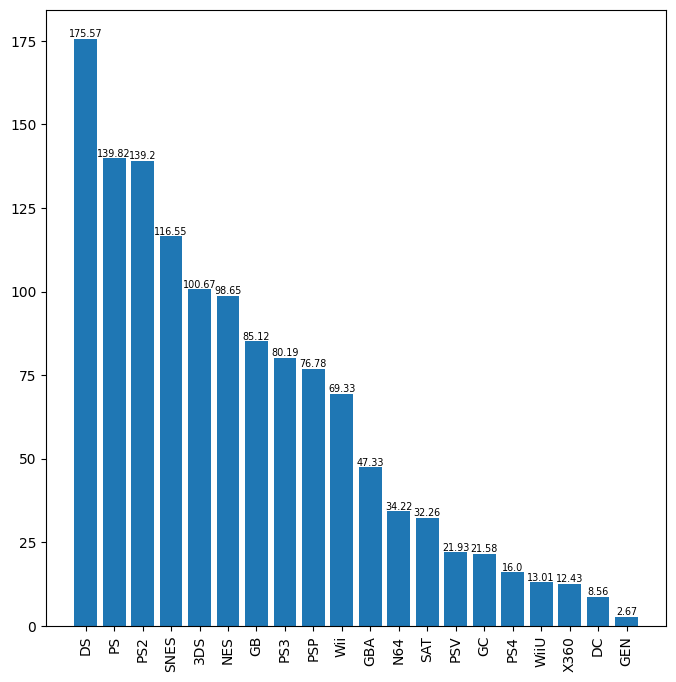

In [56]:
plot_(JP_top_platforms.Platform, round(JP_top_platforms.JP_Sales, 2))

In [57]:
Other_top_platforms.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,PS2,583.84,339.29,139.20,193.44
1,PS3,393.49,330.29,80.19,135.68
2,X360,602.47,270.76,12.43,85.76
3,Wii,496.90,262.21,69.33,79.07
4,DS,382.67,188.89,175.57,59.28


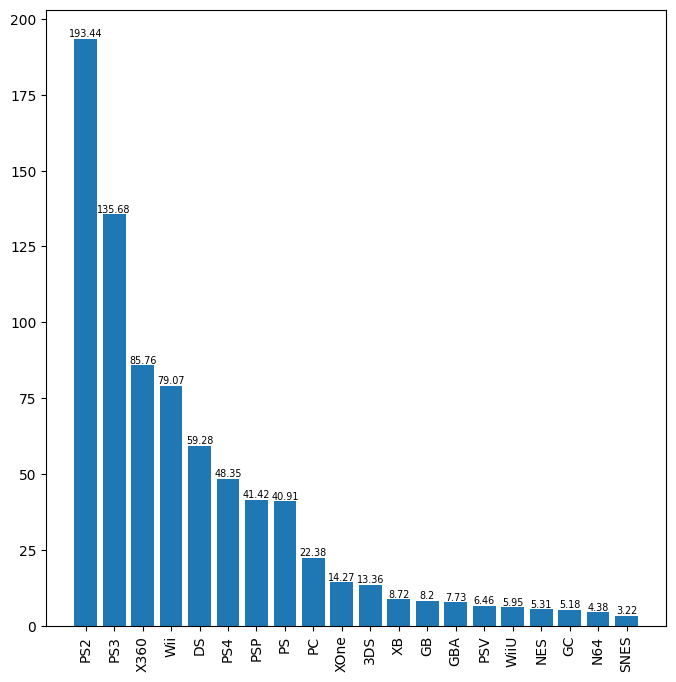

In [58]:
plot_(Other_top_platforms.Platform, round(Other_top_platforms.Other_Sales, 2))

## 3. Sales by Genre:

In [59]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [60]:
# Which genres are the most popular in terms of sales globally and in each region?

genres = data.groupby("Genre")['Global_Sales'].sum().sort_values(ascending=False).reset_index()
genres

,Genre,Global_Sales
0,Action,1745.27
1,Sports,1332.00
2,Shooter,1052.94
3,Role-Playing,934.40
4,Platform,828.08
5,Misc,803.18
6,Racing,728.90
7,Fighting,447.48
8,Simulation,390.42
9,Puzzle,243.02


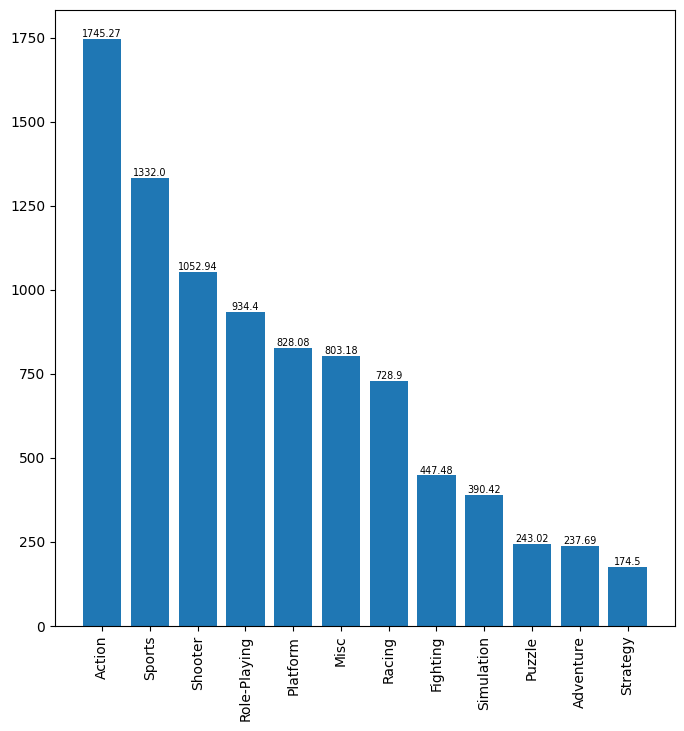

In [61]:
plot_(genres.Genre, round(genres.Global_Sales, 2))

In [62]:
genres_region_sales = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

NA_top_genres = genres_region_sales.sort_values(by='NA_Sales', ascending=False)
EU_top_genres = genres_region_sales.sort_values(by='EU_Sales', ascending=False)
JP_top_genres = genres_region_sales.sort_values(by='JP_Sales', ascending=False)
Other_top_genres = genres_region_sales.sort_values(by='Other_Sales', ascending=False)

In [63]:
NA_top_genres.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,879.01,519.13,161.44,184.60
10,Sports,684.43,376.79,135.54,134.51
8,Shooter,592.24,317.34,38.76,104.11
4,Platform,445.50,200.35,130.83,51.09
3,Misc,407.27,212.74,108.11,74.39


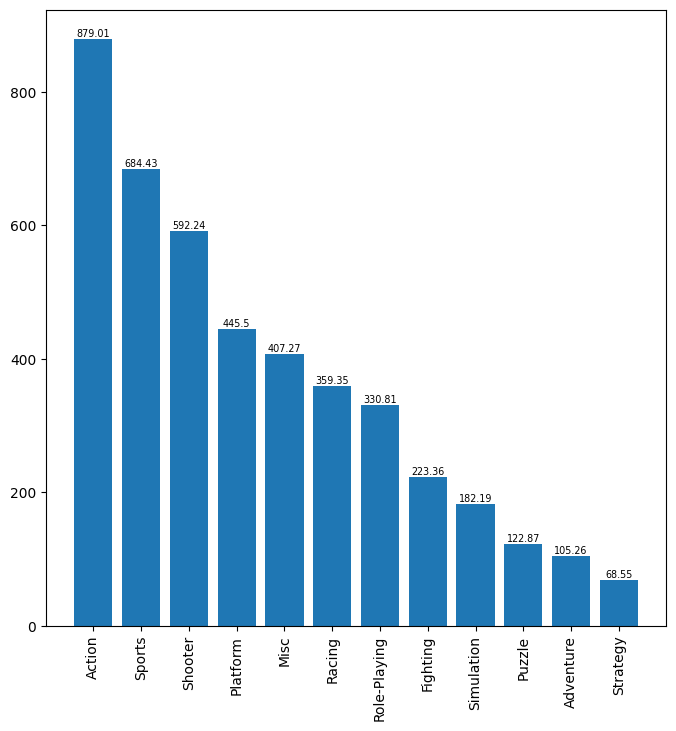

In [64]:
plot_(NA_top_genres.Genre, round(NA_top_genres.NA_Sales, 2))

In [65]:
EU_top_genres.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,879.01,519.13,161.44,184.60
10,Sports,684.43,376.79,135.54,134.51
8,Shooter,592.24,317.34,38.76,104.11
6,Racing,359.35,236.51,56.71,76.10
3,Misc,407.27,212.74,108.11,74.39


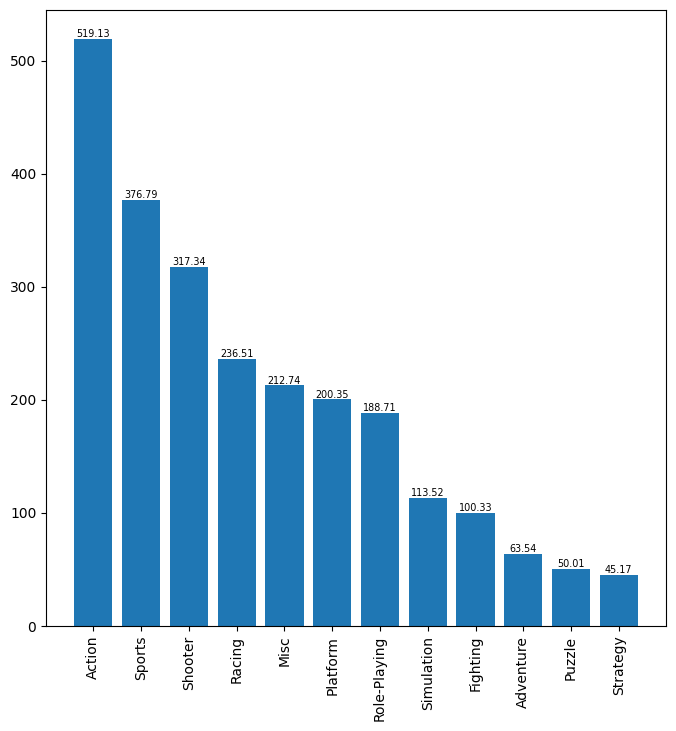

In [66]:
plot_(EU_top_genres.Genre, round(EU_top_genres.EU_Sales, 2))

In [67]:
JP_top_genres.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
7,Role-Playing,330.81,188.71,355.46,59.63
0,Action,879.01,519.13,161.44,184.60
10,Sports,684.43,376.79,135.54,134.51
4,Platform,445.50,200.35,130.83,51.09
3,Misc,407.27,212.74,108.11,74.39


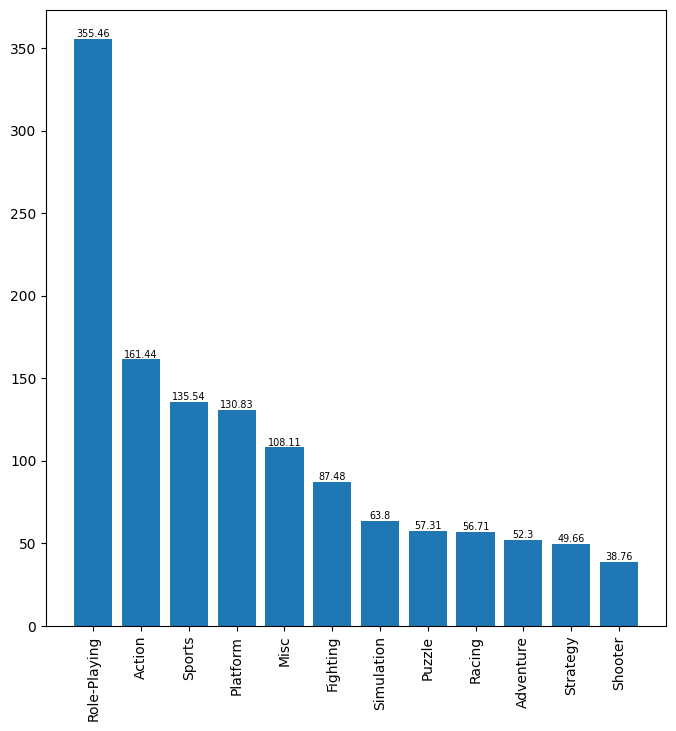

In [68]:
plot_(JP_top_genres.Genre, round(JP_top_genres.JP_Sales, 2))

In [69]:
Other_top_genres.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,879.01,519.13,161.44,184.60
10,Sports,684.43,376.79,135.54,134.51
8,Shooter,592.24,317.34,38.76,104.11
6,Racing,359.35,236.51,56.71,76.10
3,Misc,407.27,212.74,108.11,74.39


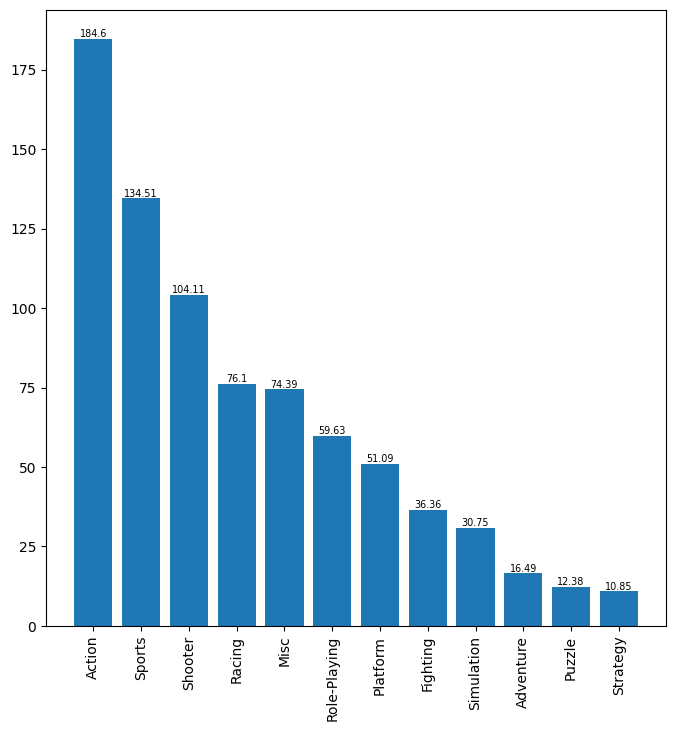

In [70]:
plot_(Other_top_genres.Genre, round(Other_top_genres.Other_Sales, 2))

In [71]:
# How do different genres perform on different platforms?

genre_performance = data.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)#.sort_values(ascending=False).head()


genre_performance

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,29.34,1.70,1.24,3.58,13.27,14.68,2.91,0.00,26.48,0.45,3.43,0.00
3DO,0.00,0.06,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.02,0.00,0.00
3DS,58.33,4.90,10.57,10.98,32.52,5.55,14.94,84.29,1.29,27.43,6.19,2.10
DC,1.26,2.50,1.83,0.00,2.54,0.00,2.65,0.68,0.33,0.52,3.66,0.00
DS,112.70,45.90,7.11,135.72,75.92,82.72,38.10,124.44,7.92,130.29,31.41,14.87
GB,7.92,17.16,0.00,13.35,54.91,47.47,4.55,88.24,1.20,3.55,9.05,8.05
GBA,55.76,14.68,4.21,36.25,78.30,12.92,18.80,64.21,3.60,5.91,16.41,7.45
GC,37.84,5.93,18.43,16.73,28.66,4.70,21.89,13.15,13.63,8.59,25.49,4.32
GEN,2.74,0.19,5.90,0.03,15.45,0.00,0.26,0.27,0.13,0.00,3.20,0.19


In [72]:
import seaborn as sns

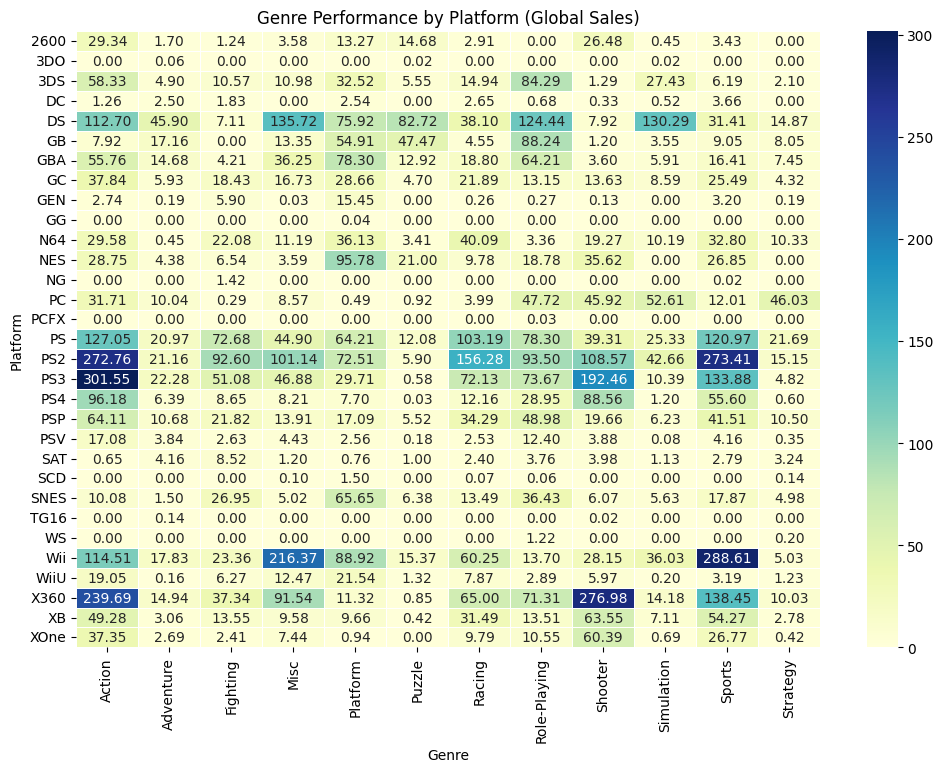

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_performance, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Genre Performance by Platform (Global Sales)')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()

## 4. Publisher Performance

In [74]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [75]:
# Which publishers have the highest total sales globally and in each region?

pub_sales = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(15)
pub_sales.head()

,Publisher,Global_Sales
0,Nintendo,1788.81
1,Electronic Arts,1131.76
2,Activision,731.16
3,Sony Computer Entertainment,606.48
4,Ubisoft,471.61


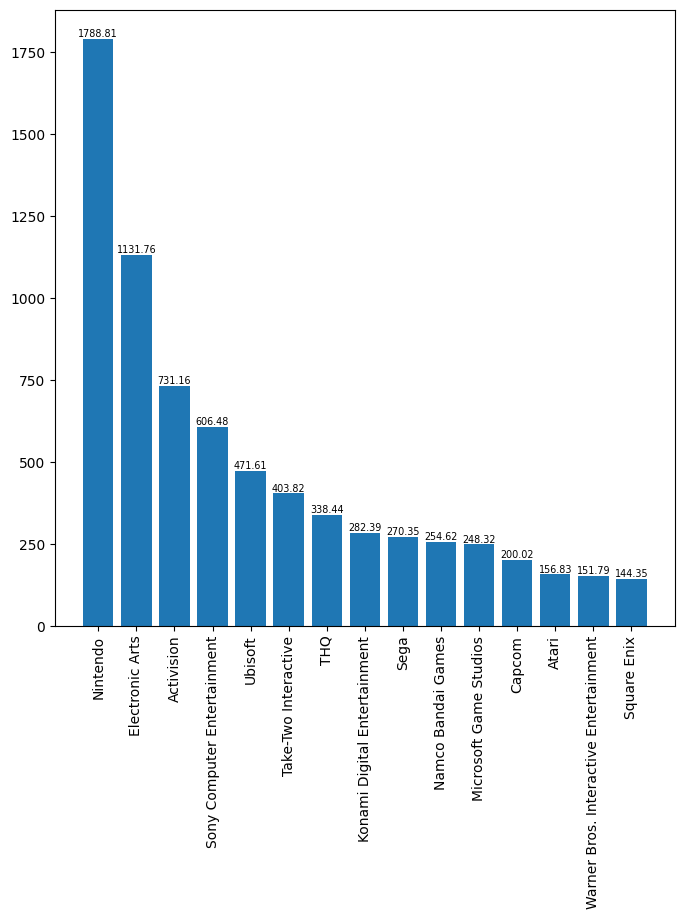

In [76]:
plot_(pub_sales.Publisher, pub_sales.Global_Sales)

In [77]:
publishers_region_sales = data.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

NA_top_pub = publishers_region_sales.sort_values(by='NA_Sales', ascending=False)[:20]
EU_top_pub = publishers_region_sales.sort_values(by='EU_Sales', ascending=False)[:20]
JP_top_pub = publishers_region_sales.sort_values(by='JP_Sales', ascending=False)[:20]
Other_top_pub = publishers_region_sales.sort_values(by='Other_Sales', ascending=False)[:20]

In [78]:
NA_top_pub.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
361,Nintendo,816.97,419.01,458.15,94.68
139,Electronic Arts,608.01,378.55,15.28,129.63
21,Activision,432.59,215.90,6.71,75.81
458,Sony Computer Entertainment,266.17,186.56,74.15,79.67
528,Ubisoft,252.74,161.99,7.52,49.18


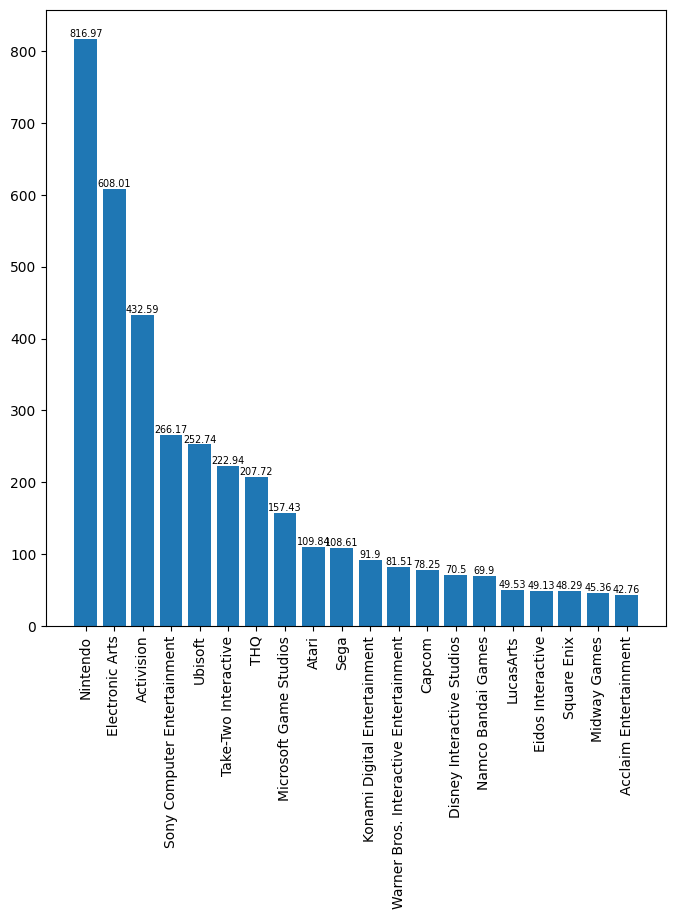

In [79]:
plot_(NA_top_pub.Publisher, NA_top_pub.NA_Sales)

In [80]:
EU_top_pub.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
361,Nintendo,816.97,419.01,458.15,94.68
139,Electronic Arts,608.01,378.55,15.28,129.63
21,Activision,432.59,215.90,6.71,75.81
458,Sony Computer Entertainment,266.17,186.56,74.15,79.67
528,Ubisoft,252.74,161.99,7.52,49.18


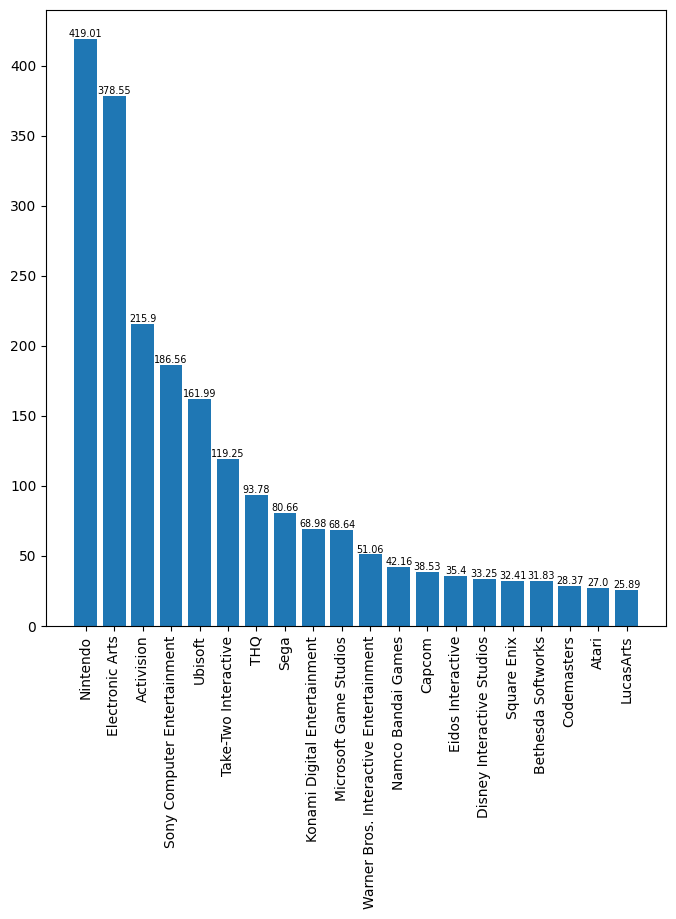

In [81]:
plot_(EU_top_pub.Publisher, round(EU_top_pub.EU_Sales, 2))

In [82]:
JP_top_pub.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
361,Nintendo,816.97,419.01,458.15,94.68
349,Namco Bandai Games,69.90,42.16,127.85,14.60
277,Konami Digital Entertainment,91.90,68.98,91.40,29.93
458,Sony Computer Entertainment,266.17,186.56,74.15,79.67
85,Capcom,78.25,38.53,68.43,14.53


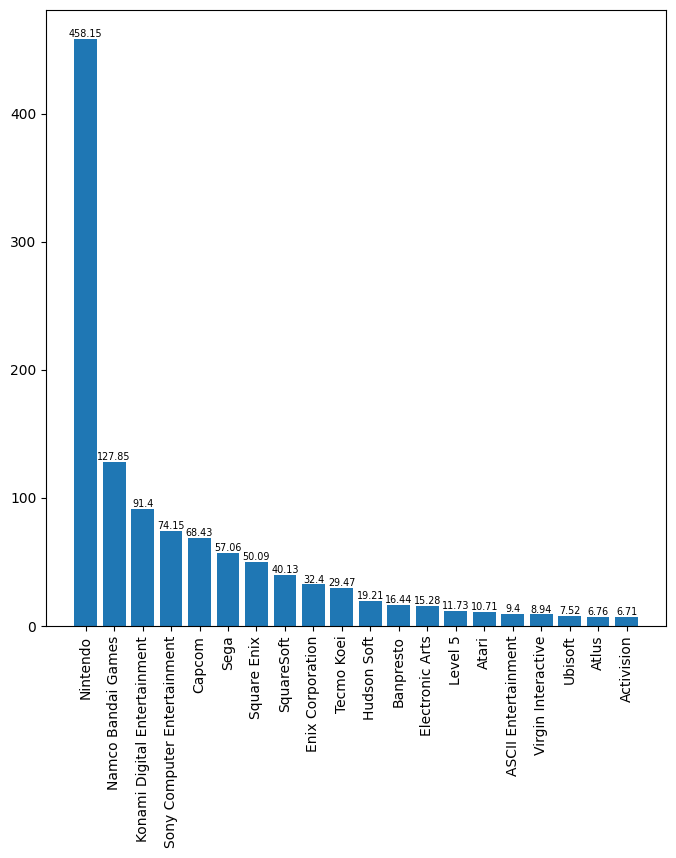

In [83]:
plot_(JP_top_pub.Publisher, round(JP_top_pub.JP_Sales,2))

In [84]:
Other_top_pub.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
139,Electronic Arts,608.01,378.55,15.28,129.63
361,Nintendo,816.97,419.01,458.15,94.68
458,Sony Computer Entertainment,266.17,186.56,74.15,79.67
21,Activision,432.59,215.90,6.71,75.81
497,Take-Two Interactive,222.94,119.25,5.93,55.72


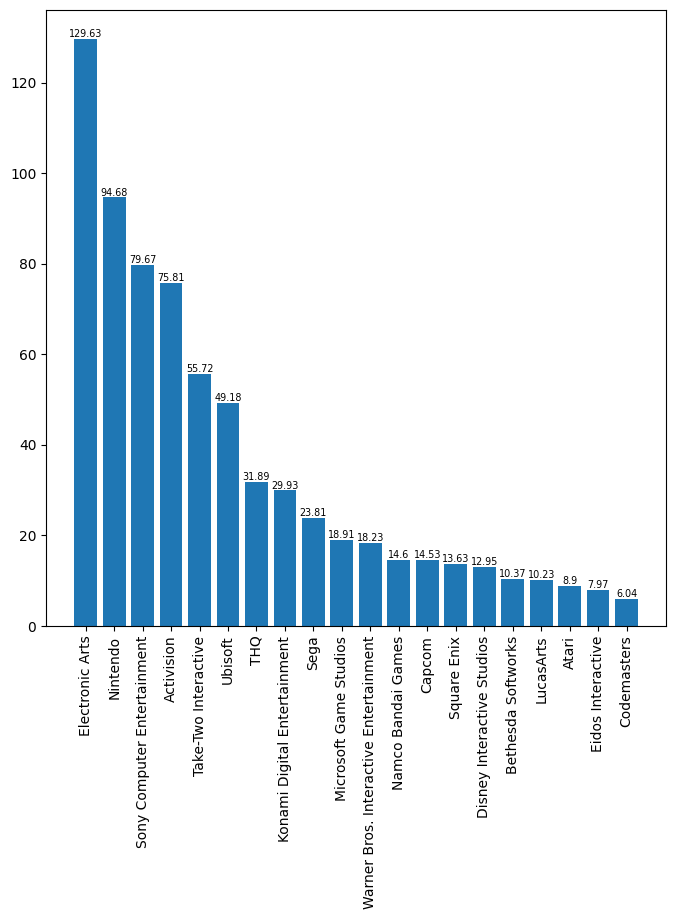

In [85]:
plot_(Other_top_pub.Publisher, round(Other_top_pub.Other_Sales,2))

In [86]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [87]:
# How do the top publishers compare in terms of sales for different genres?
# pub_gen = data.groupby(["Publisher", "Genre"])["Global_Sales"].sum().sort_values(ascending=False)

pub_gen = data.groupby(["Publisher", "Genre"])["Global_Sales"].sum().unstack()


In [88]:
pub_gen["Total"] = pub_gen.sum(axis=1)

pub_gen.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Publisher,,,,,,,,,,,,,
10TACLE Studios,NaN,0.02,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,0.06,0.11
1C Company,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.01,NaN,NaN,NaN,0.05,0.10
20th Century Fox Video Games,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,1.94
2D Boy,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,0.04
3DO,6.28,0.35,0.55,NaN,0.13,0.11,NaN,0.25,0.77,NaN,1.57,0.11,10.12


In [89]:
# data.pivot(index="Publisher", columns="Genre", values="Global_Sales")

pub_gen.sort_values(by="Total", ascending=False, inplace=True)

pub_gen.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Publisher,,,,,,,,,,,,,
Nintendo,127.84,35.44,53.08,179.93,425.94,124.26,151.30,292.10,69.46,85.15,217.04,27.27,1788.81
Electronic Arts,115.24,4.96,34.50,32.42,7.04,4.50,144.78,35.09,166.19,89.01,483.74,14.29,1131.76
Activision,140.41,5.33,2.86,75.86,33.69,1.06,17.13,46.60,306.84,8.10,75.74,17.54,731.16
Sony Computer Entertainment,94.19,13.59,28.11,80.52,103.78,3.70,109.96,43.79,58.35,8.65,59.52,2.32,606.48
Ubisoft,143.75,22.12,7.03,95.80,20.59,6.24,15.64,16.58,67.63,44.08,23.82,8.33,471.61
Take-Two Interactive,213.71,7.44,0.06,10.42,3.29,0.07,21.23,6.05,54.12,0.89,78.85,7.69,403.82
THQ,88.59,19.84,72.55,23.24,40.95,9.15,39.97,1.13,14.81,7.75,13.10,7.36,338.44
Konami Digital Entertainment,70.72,9.55,1.72,18.44,14.69,0.79,1.27,13.71,9.45,32.14,98.98,10.93,282.39
Sega,31.79,7.41,14.56,20.07,60.28,2.53,21.31,14.63,16.32,3.57,71.01,6.87,270.35


In [90]:
# data.Publisher.value_counts().head(100)

pub_gen[:10]

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Publisher,,,,,,,,,,,,,
Nintendo,127.84,35.44,53.08,179.93,425.94,124.26,151.30,292.10,69.46,85.15,217.04,27.27,1788.81
Electronic Arts,115.24,4.96,34.50,32.42,7.04,4.50,144.78,35.09,166.19,89.01,483.74,14.29,1131.76
Activision,140.41,5.33,2.86,75.86,33.69,1.06,17.13,46.60,306.84,8.10,75.74,17.54,731.16
Sony Computer Entertainment,94.19,13.59,28.11,80.52,103.78,3.70,109.96,43.79,58.35,8.65,59.52,2.32,606.48
Ubisoft,143.75,22.12,7.03,95.80,20.59,6.24,15.64,16.58,67.63,44.08,23.82,8.33,471.61
Take-Two Interactive,213.71,7.44,0.06,10.42,3.29,0.07,21.23,6.05,54.12,0.89,78.85,7.69,403.82
THQ,88.59,19.84,72.55,23.24,40.95,9.15,39.97,1.13,14.81,7.75,13.10,7.36,338.44
Konami Digital Entertainment,70.72,9.55,1.72,18.44,14.69,0.79,1.27,13.71,9.45,32.14,98.98,10.93,282.39
Sega,31.79,7.41,14.56,20.07,60.28,2.53,21.31,14.63,16.32,3.57,71.01,6.87,270.35


In [91]:
# pub_gen_copy = pub_gen.copy()
# pub_gen_copy.reset_index()['Publisher'].value_counts()

top_publishers = data.groupby("Publisher")["Global_Sales"].sum().nlargest(49).index   # Get the index of the 50 top publishers.

top_pub_gen = pub_gen.loc[top_publishers]   # Filter for the top 50 publishers

other_pub_gen = pub_gen.loc[~pub_gen.index.isin(top_publishers)].sum() # Group the other publishers together
top_pub_gen.loc['Other'] = other_pub_gen # Add others as a row

top_pub_gen.drop('Total', axis=1, inplace=True)

top_pub_gen.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Publisher,,,,,,,,,,,,
Nintendo,127.84,35.44,53.08,179.93,425.94,124.26,151.30,292.10,69.46,85.15,217.04,27.27
Electronic Arts,115.24,4.96,34.50,32.42,7.04,4.50,144.78,35.09,166.19,89.01,483.74,14.29
Activision,140.41,5.33,2.86,75.86,33.69,1.06,17.13,46.60,306.84,8.10,75.74,17.54
Sony Computer Entertainment,94.19,13.59,28.11,80.52,103.78,3.70,109.96,43.79,58.35,8.65,59.52,2.32
Ubisoft,143.75,22.12,7.03,95.80,20.59,6.24,15.64,16.58,67.63,44.08,23.82,8.33


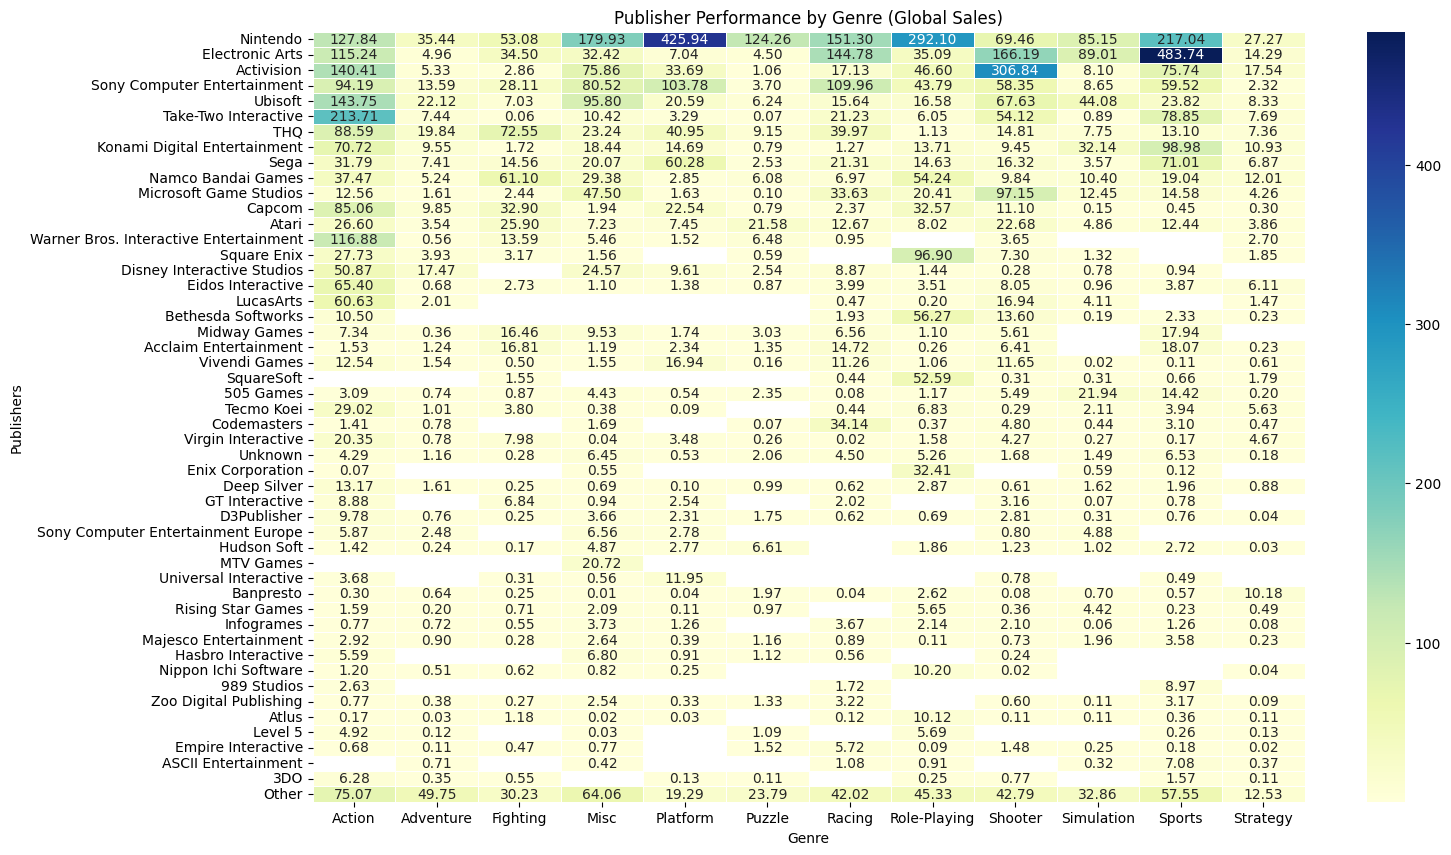

In [92]:
plt.figure(figsize=(16, 10))
sns.heatmap(top_pub_gen, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Publisher Performance by Genre (Global Sales)')
plt.xlabel('Genre')
plt.ylabel('Publishers')
plt.show()

# Game Performance Analysis:
## 5. Critic vs. User Ratings:

In [93]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [94]:
data.User_Score.max()

9.7

In [95]:
data.Critic_Score.max()

98.0

#### It seems User_Score and Critic_Score is not in the same scale. Hence to correct this, we have to divide the Critic_Score by 10.

In [96]:
# How do critic scores compare to user scores for the top-selling games?

top_selling_games = data.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(20)
data['Critic_Score'] = data['Critic_Score']/10
# data["Critic_Score"].fillna(0, inplace=True)  #Already handled earlier
# data['User_Score'] = data["User_Score"].replace("tbd", "0").fillna(0) #Already handled earlier


# data.User_Score.info()

In [97]:
# data.User_Score = data.User_Score.astype(float) #Already handled earlier

In [98]:
critic_user_score = data.groupby('Name')[['Critic_Score', "User_Score"]].mean().sort_values(by=["Critic_Score", "User_Score"], ascending=False).reset_index()

critic_user_score.head()

,Name,Critic_Score,User_Score
0,SoulCalibur,9.8,8.8
1,Metroid Prime,9.7,9.3
2,Super Mario Galaxy 2,9.7,9.1
3,Super Mario Galaxy,9.7,8.9
4,NFL 2K1,9.7,6.0


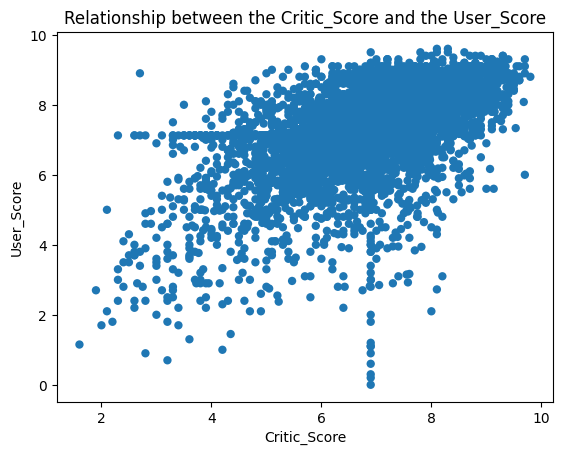

In [99]:
cus = critic_user_score.drop('Name', axis=1)
cus.head()

# plt.scatter(cus.Critic_Score, cus.User_Score)
sns.scatterplot(data=cus, x='Critic_Score', y='User_Score', edgecolor='none');
plt.title("Relationship between the Critic_Score and the User_Score");

### This shows that the Critic_Score and the User_Score are directly correlated such that there is an increase in User Score with every increase in Critic Score

In [101]:
# Is there a correlation between high sales and high critic or user scores?

critic_user_score_vs_gs = data.groupby('Name')[['Global_Sales', 'Critic_Score', "User_Score"]].mean().sort_values(
    by=['Global_Sales', "Critic_Score", "User_Score"], ascending=False).reset_index()


conditions = [(critic_user_score_vs_gs.Global_Sales >=70), (critic_user_score_vs_gs.Global_Sales >=25) & (critic_user_score_vs_gs.Global_Sales <70),
 (critic_user_score_vs_gs.Global_Sales >=10) & (critic_user_score_vs_gs.Global_Sales <25), (critic_user_score_vs_gs.Global_Sales <10)]
values = ['Very High', 'High', 'Medium', 'Low']

critic_user_score_vs_gs['gs_grade'] = np.select(conditions, values)



critic_user_score_vs_gs.head()

,Name,Global_Sales,Critic_Score,User_Score,gs_grade
0,Wii Sports,82.53,7.600000,8.000000,Very High
1,Mario Kart Wii,35.52,8.200000,8.300000,High
2,Wii Sports Resort,32.77,8.000000,8.000000,High
3,Pokemon Red/Pokemon Blue,31.37,6.896768,7.125046,High
4,New Super Mario Bros.,29.80,8.900000,8.500000,High


In [102]:
critic_user_score_vs_gs.Global_Sales.median()

0.15

In [103]:
critic_user_score_vs_gs.Global_Sales.max()

82.53

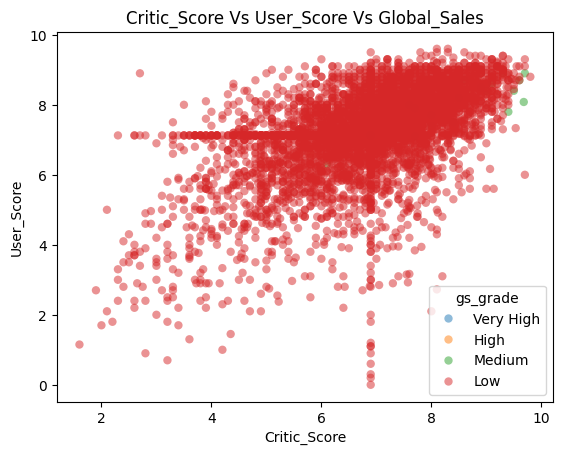

In [104]:
sns.scatterplot(data=critic_user_score_vs_gs, x='Critic_Score', y='User_Score', hue = 'gs_grade' , edgecolor='none', alpha=0.5);
plt.title("Critic_Score Vs User_Score Vs Global_Sales");

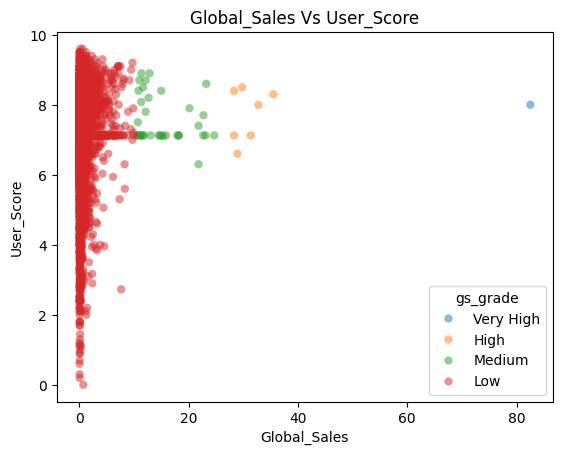

In [105]:
sns.scatterplot(data=critic_user_score_vs_gs, x='Global_Sales', y='User_Score', hue = 'gs_grade' , edgecolor='none', alpha=0.5);
plt.title("Global_Sales Vs User_Score");

### We see there is little or no correlation between Global Sales and User Score. Though the highest selling movies in the category "Medium" and above that is the movies with global sales above 10 units are highly rated by the users.

## 6. Impact of Developer:

In [106]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [107]:
from os import device_encoding
# Do games from certain developers consistently receive higher ratings or sales?

dev_critic_user_score_vs_gs = data.groupby('Developer')[['Global_Sales', 'Critic_Score', "User_Score"]].mean().sort_values(
    by=['Global_Sales', "Critic_Score", "User_Score"], ascending=False).reset_index()


dev_critic_user_score_vs_gs.head()

,Developer,Global_Sales,Critic_Score,User_Score
0,Good Science Studio,21.810000,6.100000,6.300000
1,"Retro Studios, Entertainment Analysis & Develo...",12.660000,8.500000,8.200000
2,"Infinity Ward, Sledgehammer Games",9.923333,8.466667,3.033333
3,Polyphony Digital,9.314286,8.828571,8.128571
4,Rockstar North,8.533571,9.285714,8.285714


In [108]:
dev_critic_user_score_vs_gs.Global_Sales.mean()

0.43032478523986784

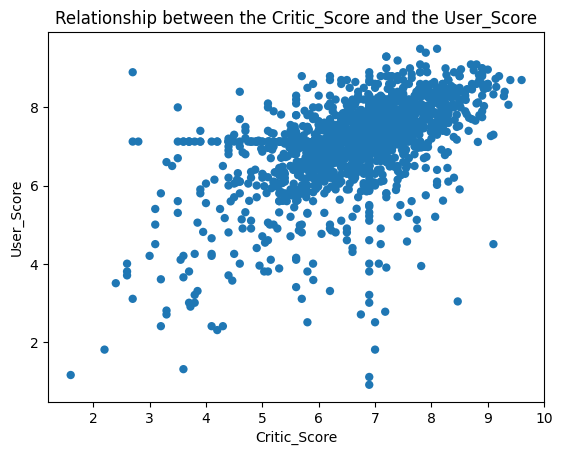

In [109]:
sns.scatterplot(data=dev_critic_user_score_vs_gs, x='Critic_Score', y='User_Score', edgecolor='none');
plt.title("Relationship between the Critic_Score and the User_Score");

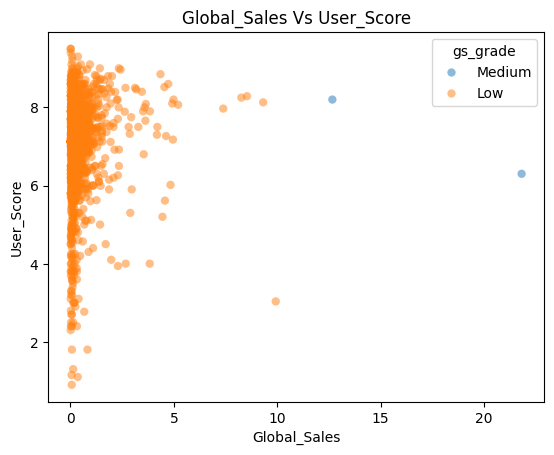

In [110]:
conditions = [(dev_critic_user_score_vs_gs.Global_Sales >=70), (dev_critic_user_score_vs_gs.Global_Sales >=25) & (dev_critic_user_score_vs_gs.Global_Sales <70),
 (dev_critic_user_score_vs_gs.Global_Sales >=10) & (dev_critic_user_score_vs_gs.Global_Sales <25), (dev_critic_user_score_vs_gs.Global_Sales <10)]
values = ['Very High', 'High', 'Medium', 'Low']

dev_critic_user_score_vs_gs['gs_grade'] = np.select(conditions, values)

sns.scatterplot(data=dev_critic_user_score_vs_gs, x='Global_Sales', y='User_Score', hue = 'gs_grade' , edgecolor='none', alpha=0.5);
plt.title("Global_Sales Vs User_Score");

### Most of the developers of these games make less than 10 units in global sales across their games on average.

In [111]:
data.groupby(['Name','Developer'])[['Global_Sales', 'Critic_Score', "User_Score"]].mean().sort_values(
    by=['Global_Sales', "Critic_Score", "User_Score"], ascending=False).reset_index()

,Name,Developer,Global_Sales,Critic_Score,User_Score
0,Wii Sports,Nintendo,82.53,7.600000,8.000000
1,Mario Kart Wii,Nintendo,35.52,8.200000,8.300000
2,Wii Sports Resort,Nintendo,32.77,8.000000,8.000000
3,Pokemon Red/Pokemon Blue,Ubisoft,31.37,6.896768,7.125046
4,New Super Mario Bros.,Nintendo,29.80,8.900000,8.500000
...,...,...,...,...,...
12699,Double Sequence: The Q-Virus Invasion,Next Wave Team,0.01,3.700000,7.125046
12700,The Wild West,Happy Happening,0.01,3.500000,7.125046
12701,Aquaman: Battle for Atlantis,TDK Mediactive,0.01,2.700000,3.100000
12702,Aquaman: Battle for Atlantis,Lucky Chicken,0.01,2.600000,2.700000


In [112]:
# How do different developers perform across various genres and platforms?

dpg = data.groupby(['Developer', 'Platform', 'Genre'])[['Global_Sales']].sum().sort_values(by='Global_Sales', ascending=False).reset_index()
dpg.head()


,Developer,Platform,Genre,Global_Sales
0,Nintendo,Wii,Sports,159.79
1,Ubisoft,NES,Platform,95.78
2,Ubisoft,PS,Sports,95.56
3,Ubisoft,GB,Role-Playing,88.24
4,Ubisoft,SNES,Platform,65.65


In [113]:
# dpg.pivot_table(values='Global_Sales', index=['Developer', 'Platform'], columns='Genre')

## 7. Rating Analysis

In [114]:
# What is the distribution of game ratings (Critic Score and User Score) across different platforms and genres?

data.groupby(['Platform', 'Genre'])[['Critic_Score', "User_Score"]].mean().sort_values(by=["Critic_Score", "User_Score"], ascending=False).reset_index()


,Platform,Genre,Critic_Score,User_Score
0,DC,Role-Playing,8.800000,9.050000
1,PS4,Puzzle,8.800000,8.400000
2,DC,Simulation,8.200000,8.400000
3,DC,Platform,7.898384,7.862523
4,PC,Role-Playing,7.787840,7.359141
...,...,...,...,...
288,X360,Puzzle,6.341472,5.753591
289,Wii,Racing,6.332393,6.540080
290,WiiU,Adventure,6.164512,6.341682
291,XB,Puzzle,5.741934,6.764325


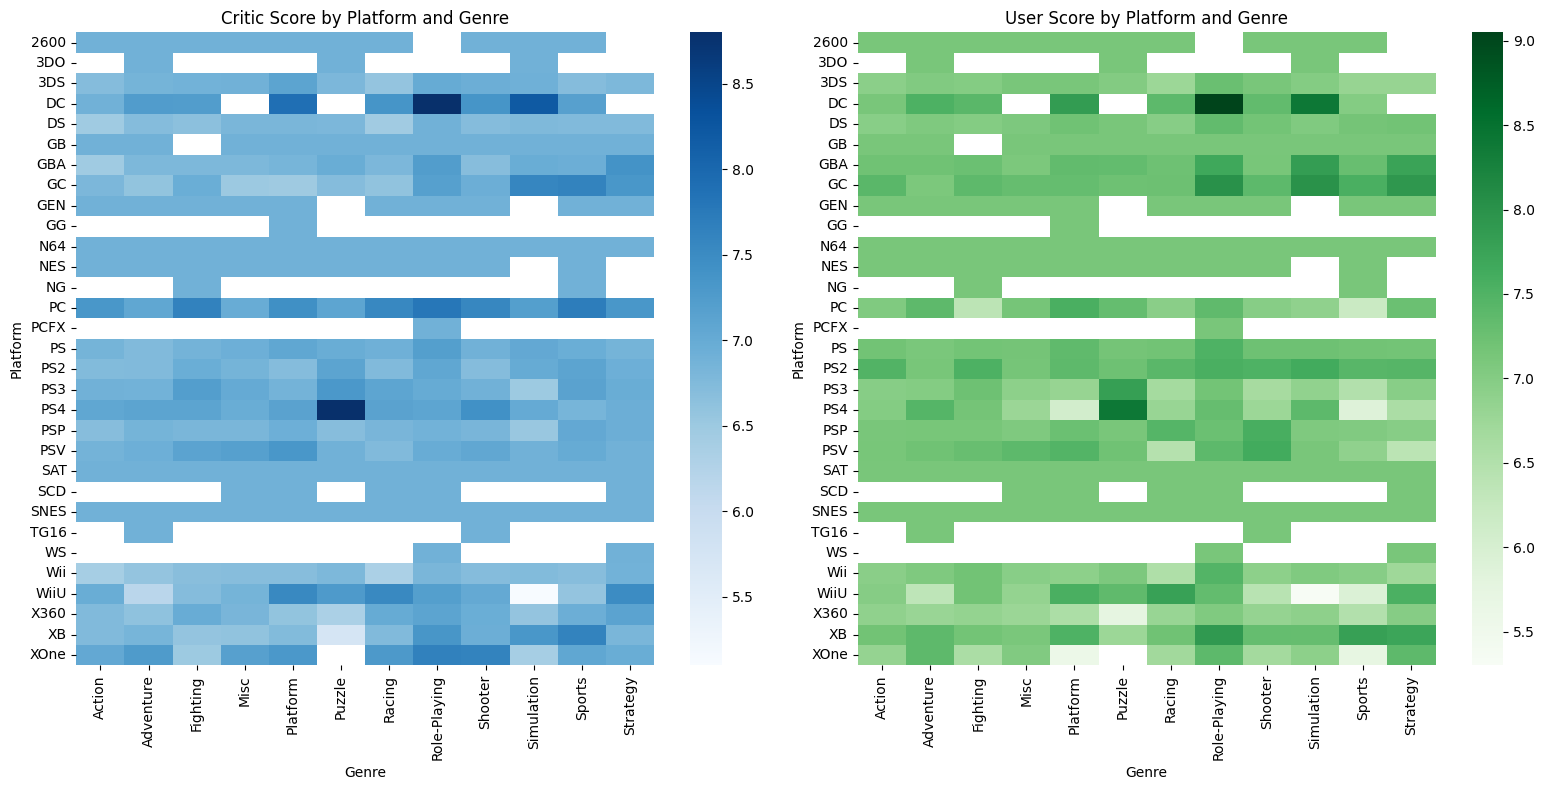

In [115]:
# AI Assisted

mean_scores = data.groupby(['Platform', 'Genre'])[['Critic_Score', 'User_Score']].mean()

# Plotting heatmaps for Critic_Score and User_Score
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap for Critic_Score
sns.heatmap(mean_scores['Critic_Score'].unstack(), ax=ax[0], cmap='Blues', annot=False)
ax[0].set_title('Critic Score by Platform and Genre')

# Heatmap for User_Score
sns.heatmap(mean_scores['User_Score'].unstack(), ax=ax[1], cmap='Greens', annot=False)
ax[1].set_title('User Score by Platform and Genre')

plt.tight_layout()
plt.show()

In [116]:
## Bubble Chart

# mean_scores_reset = data.groupby(['Platform', 'Genre'])[['Critic_Score', 'User_Score']].mean().reset_index()

# # Melt the dataframe for easier plotting with Seaborn
# melted_scores = mean_scores_reset.melt(id_vars=['Platform', 'Genre'], value_vars=['Critic_Score', 'User_Score'], var_name='Score_Type', value_name='Score')

# plt.figure(figsize=(12, 8))
# plt.scatter(mean_scores_reset['Platform'], mean_scores_reset['Genre'],
#             s=mean_scores_reset['Critic_Score']*20, alpha=0.5, label='Critic Score', c='blue')
# plt.scatter(mean_scores_reset['Platform'], mean_scores_reset['Genre'],
#             s=mean_scores_reset['User_Score']*20, alpha=0.5, label='User Score', c='green')

# plt.title('Critic and User Scores by Platform and Genre (Bubble Size = Score)')
# plt.xlabel('Platform')
# plt.ylabel('Genre')
# plt.xticks(rotation=90)
# plt.legend()
# plt.show()

In [117]:
# How do games with different ratings (e.g., "E", "T", "M") perform in terms of sales?

Rat = data.groupby('Rating')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
Rat

,Rating,Global_Sales
0,E,5285.69
1,T,1494.40
2,M,1473.84
3,E10+,655.81
4,K-A,4.33
5,AO,1.95
6,EC,1.78
7,RP,0.08


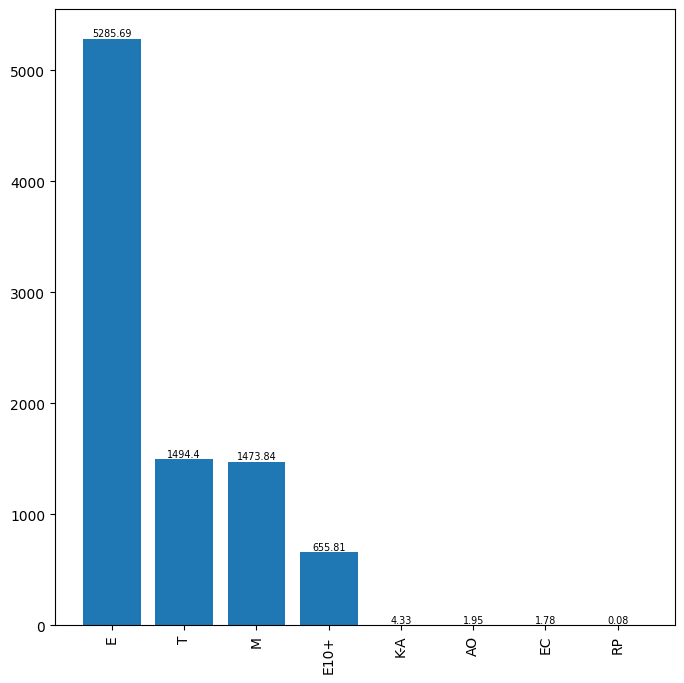

In [118]:
plot_(Rat.Rating, Rat.Global_Sales)